In [44]:
"""
Vanderplax Chp5 ML Handwritten Digits Application
April 15, 2019
Jennifer Yoon
"""

'\nVanderplax Chp5 ML Handwritten Digits Application\nApril 15, 2019\nJennifer Yoon\n'

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

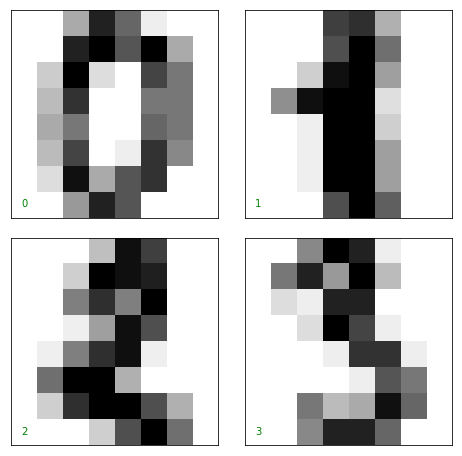

In [47]:
# first image
fig, axes = plt.subplots(2, 2, figsize=(8, 8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

When visually comparing the plotted image with their grayscale arrays, there is concurrence.

In [48]:
digits.images[0, 0:8, 0:8]  #  first sample, "0."

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [49]:
digits.images[1, 0:8, 0:8]   # second sample, "1."

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [50]:
digits.images[2, 0:8, 0:8]   # third sample, "2."

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [51]:
digits.images[3, 0:8, 0:8]   # fourth sample, "3."

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

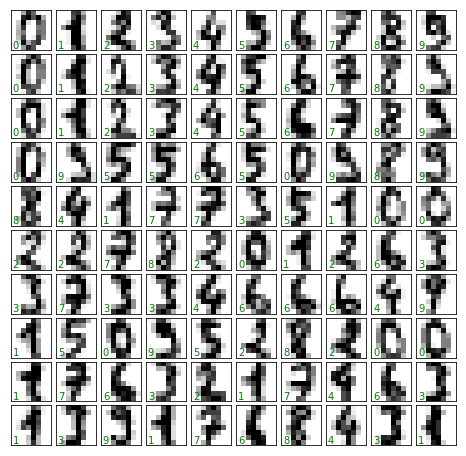

In [52]:
# second image, first 100 samples.
fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [53]:
# Flatten out image array, 1797 samples, 64 pixels (features).
X = digits.data
X.shape

(1797, 64)

In [54]:
y = digits.target
y.shape

(1797,)

### Dimensionality Reduction, isomap
In order to visualize the separation between digits, we reduce the feature space from 64 pixels to 2 axis.

In [55]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

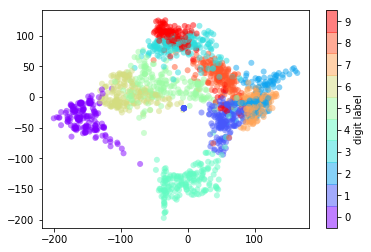

In [56]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

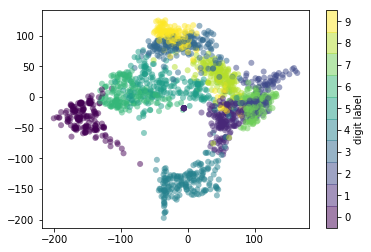

In [57]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Zero and four seem to be distict from others.  Nine and three are close together and overlap.  Five and six are next to each other, but only have minor overlap.  Seven and two are near each other and have moderate overlap.  Seven and one also have moderate overlap.  One and zero are at opposite sides of each other.

### Classification on digits
Split the data into training and test sets.  Fit a naive Bayes model.  Measure prediction accuracy.

In [74]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
# Randomly split images into test set and training set.
# Manually split, so image and fitted number matches up.

In [75]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8533333333333334

In [76]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)


Text(91.68,0.5,'true value')

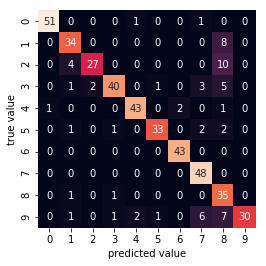

In [77]:
import seaborn as sns
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

Zero is the only digit with no errors.  When true value was zero, all predicted values were also zero.  Two, eight, and nine seemed to be confused more than other numbers.

### Replot digits, green label correct, red label error.

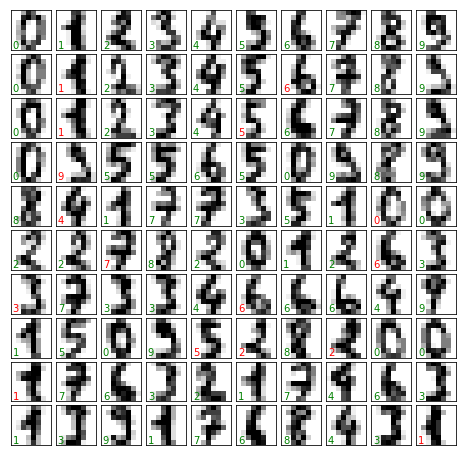

In [80]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

Labels match image target.  Red color is errors.  Green color is correct prediction.  Changed from book, which has mis-matched labels with target images.

In [81]:
digits.images[11, 0:8, 0:8]   #  sample, "1."

array([[ 0.,  0.,  0.,  0., 14., 13.,  1.,  0.],
       [ 0.,  0.,  0.,  5., 16., 16.,  2.,  0.],
       [ 0.,  0.,  0., 14., 16., 12.,  0.,  0.],
       [ 0.,  1., 10., 16., 16., 12.,  0.,  0.],
       [ 0.,  3., 12., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 16., 15.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 16., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13., 16.,  1.,  0.]])

In [86]:
y_model[12]

7

In [87]:
ytest[12]

7